0    2025-10-29 16:40:00
1    2025-10-29 16:10:00
2    2025-10-29 15:40:00
3    2025-10-29 15:20:00
4    2025-10-29 15:00:00
5    2025-10-29 14:34:00
6    2025-10-29 14:07:00
7    2025-10-29 13:49:00
8    2025-10-29 13:03:00
9    2025-10-29 12:31:00
10   2025-10-29 11:41:00
11   2025-10-29 11:19:00
12   2025-10-29 10:44:00
13   2025-10-29 10:21:00
14   2025-10-29 09:38:00
15   2025-10-29 09:22:00
16   2025-10-29 08:32:00
17   2025-10-29 08:11:00
18   2025-10-29 07:18:00
19   2025-10-29 06:17:00
20   2025-10-29 06:12:00
21   2025-10-29 05:05:00
22   2025-10-28 22:10:00
23   2025-10-28 22:00:00
24   2025-10-28 21:10:00
25   2025-10-29 14:45:00
26   2025-10-29 16:15:00
27   2025-10-29 16:15:00
28   2025-10-29 15:15:00
29   2025-10-29 15:15:00
30   2025-10-29 15:00:00
31   2025-10-28 21:58:00
32   2025-10-28 18:51:00
33   2025-10-28 17:31:00
34   2025-10-28 14:58:00
35   2025-10-28 14:15:00
36   2025-10-29 13:30:00
37   2025-10-29 13:30:00
38   2025-10-28 10:36:00
39   2025-10-28 10:01:00


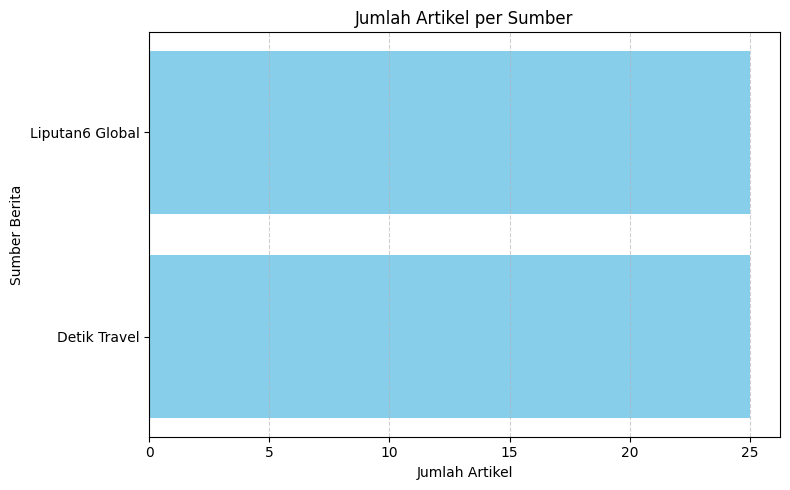

In [5]:
# ---[ Import Library ]---
import pandas as pd
import matplotlib.pyplot as plt

# ---[ Baca data dari file CSV ]---
df = pd.read_csv("hasil_crawling_berita.csv")

# ---[ Konversi kolom waktu jadi datetime kalau memungkinkan ]---
def parse_waktu(w):
    if not isinstance(w, str) or w == 'Tidak ada waktu':
        return pd.NaT
    try:
        return pd.to_datetime(w, format="%Y-%m-%d %H:%M:%S", errors="coerce")
    except ValueError:
        return pd.NaT

# --- Terapkan fungsi ke kolom waktu --- 
df["tanggal_publish"] = df["waktu"].apply(parse_waktu)

print(df["tanggal_publish"])
print("\nTanggal paling awal:", df["tanggal_publish"])
print("Tanggal paling akhir:", df["tanggal_publish"])

# ---[ Analisis Jumlah Artikel per Sumber ]---
jumlah_per_source = df.groupby('source').size().reset_index(name='jumlah_artikel')
print("\nJumlah Artikel per Sumber:")
print(jumlah_per_source)

# ---[ Visualisasi Bar Chart ]---
plt.figure(figsize=(8, 5))
plt.barh(jumlah_per_source["source"], jumlah_per_source["jumlah_artikel"], color="skyblue")
plt.xlabel("Jumlah Artikel")
plt.ylabel("Sumber Berita")
plt.title("Jumlah Artikel per Sumber")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
